In [104]:
%matplotlib inline

import os
import imageio
import numpy as np
import scipy.ndimage
import astropy
from pylab import *

from astropy import modeling
from astropy.modeling.models import custom_model


In [2]:
dd=imageio.imread("image.png")[:,:,0]
dd.shape

(1960, 2618)

In [3]:
dd2=imageio.imread("TestSlit1.tif")
dd2.shape

(1080, 1440)

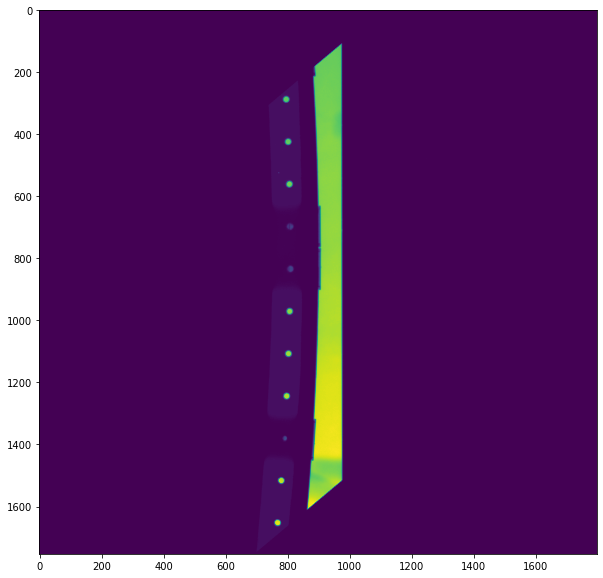

In [90]:
figure(figsize=(10,10))
imshow(scipy.ndimage.interpolation.rotate(dd2, -140))


# The Model

In [171]:
def fit_erf(x, mn, mx, sig, off):
    
    y = scipy.special.erf((x-off)/sig)
    y = y-y.min()
    y = y/y.max()

    y = y*(mx-mn) + mn
    return y


@custom_model
def erf1d(x, mn=0, mx=255, sig=3, offset=0):
    
    return fit_erf(x, mn, mx, sig, offset)

fit = astropy.modeling.fitting.LevMarLSQFitter()

## The Fitter

In [172]:

def fitter(xs, ys, img, draw=True, mn=40, mx=110):
    

    if draw: figure(figsize=(10,10))
    cnt = 1
    res = []
    for i in ys:
        cnt += 1
        f = img[i, xs]
        plot(xs,f)
        m = fit(erf1d(mn=mn, mx=mx, offset=np.mean(xs)), xs, f)
        if draw: plot(xs, m(xs))

        res.append(m.parameters)
    res = np.array(res)
    
    return res

In [173]:
path = "2020-09-16"
files = os.listdir(path)

imgs = []
for file in files:
    dd = imageio.imread("%s/%s" % (path, file))
    rotd = scipy.ndimage.interpolation.rotate(dd, -105)

    imgs.append(rotd)


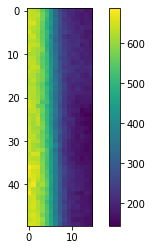

In [174]:
imshow(imgs[0][500:550,615:630]) ; colorbar()

In [175]:
imgs[0].shape

(1670, 1416)

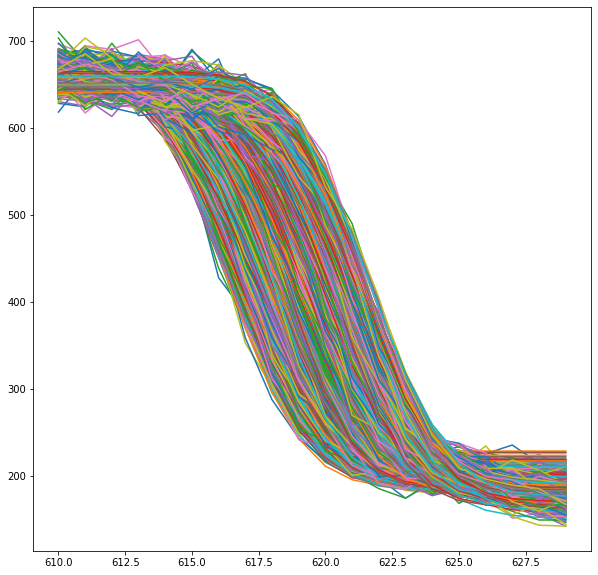

In [190]:
xs = np.arange(610,630)
ys = np.arange(200,650)

r = fitter(xs, ys, imgs[0], mn=200, mx=700)


In [191]:
mn,mx,sig,off = r.T

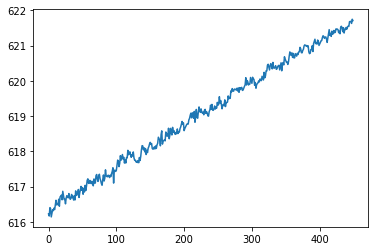

In [192]:
plot(off)

/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered

/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered

/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered

/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/npk/virtualenv/astropy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


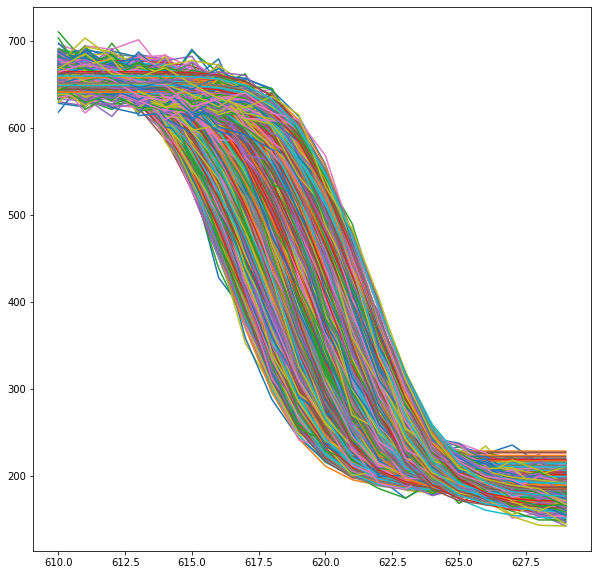

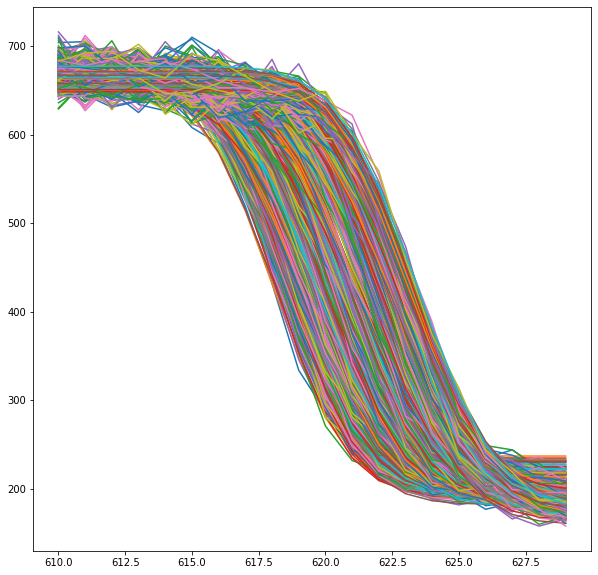

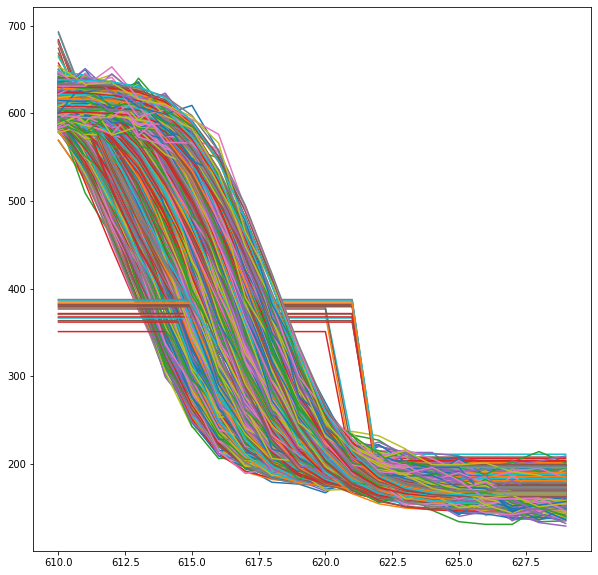

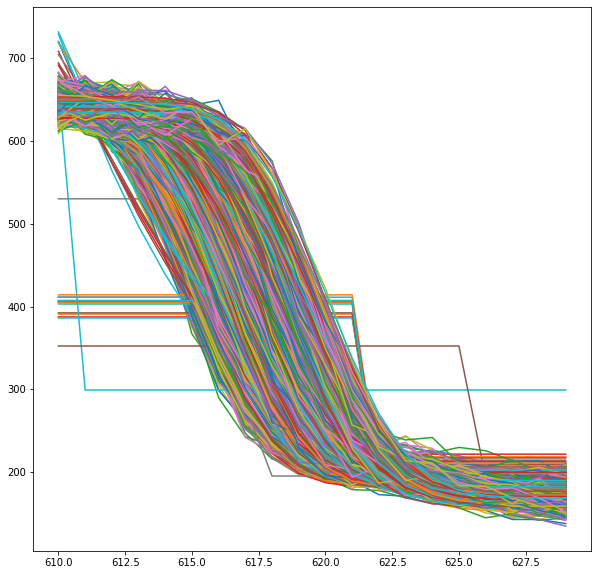

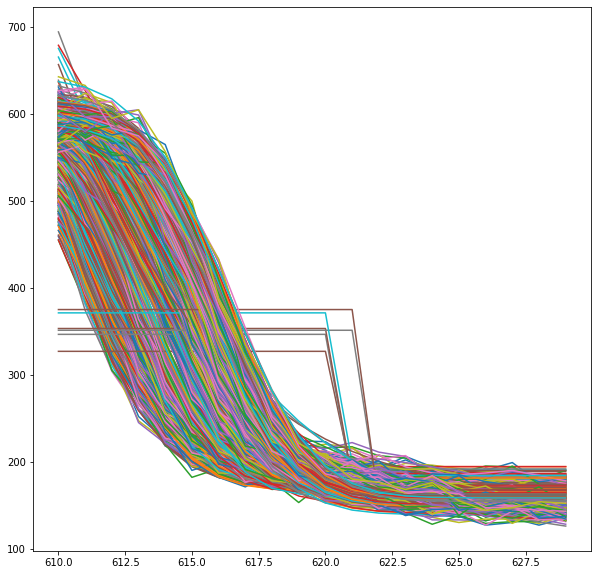

In [193]:
xs = np.arange(610,630)
ys = np.arange(200,650)

allres = []
for img in imgs:
    r = fitter(xs, ys, img, mn=150, mx=700)
    
    allres.append(r)
    

In [194]:
offs = []

for res in allres:
    mn,mx,sig,off = res.T
    offs.append(off)

offs = np.array(offs)

Text(0, 0.5, 'offset position')

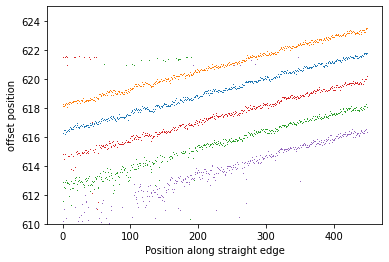

In [201]:
for off in offs: plot(off,',')
ylim(610,625)
xlabel("Position along straight edge")
ylabel("offset position")

# Fit across rows

In [79]:
dd = imageio.imread("001.tif")
dd2 = imageio.imread("010.tif")
rotd = scipy.ndimage.interpolation.rotate(dd, -140)
rotd2 = scipy.ndimage.interpolation.rotate(dd2, -140)

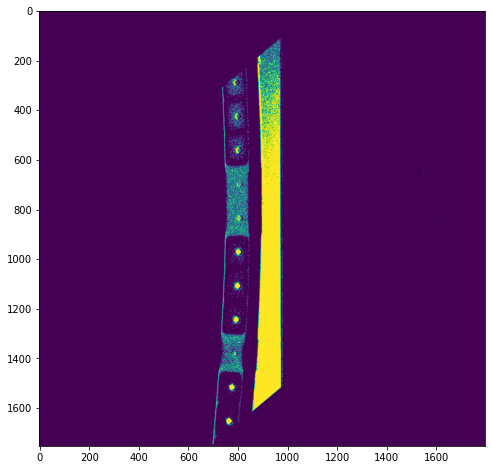

In [80]:
figure(figsize=(8,8)) ; imshow(rotd-rotd2)

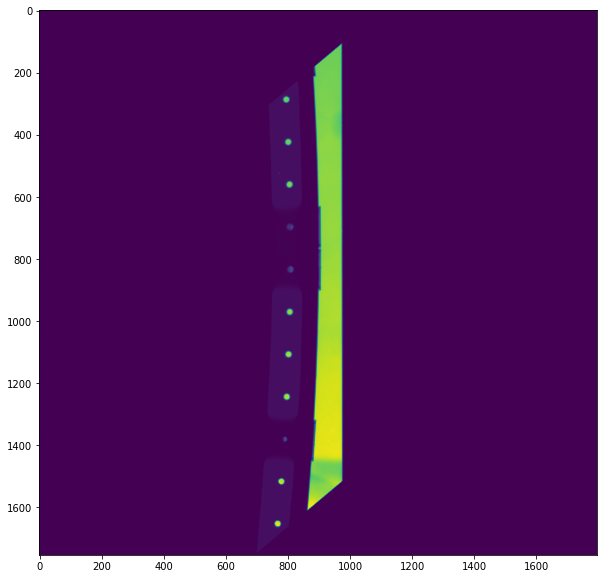

In [81]:
figure(figsize=(10,15))
imshow(rotd)

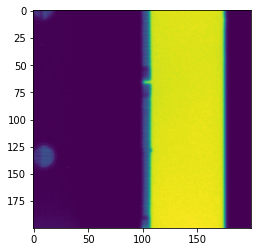

In [82]:
xmid = 800
ymid = 900
xsl = slice(xmid-100,xmid+100)
ysl = slice(ymid-100,ymid+100)
imshow(rotd[xsl,ysl]) 
#plot(rotd[xmid, ysl], 'r')

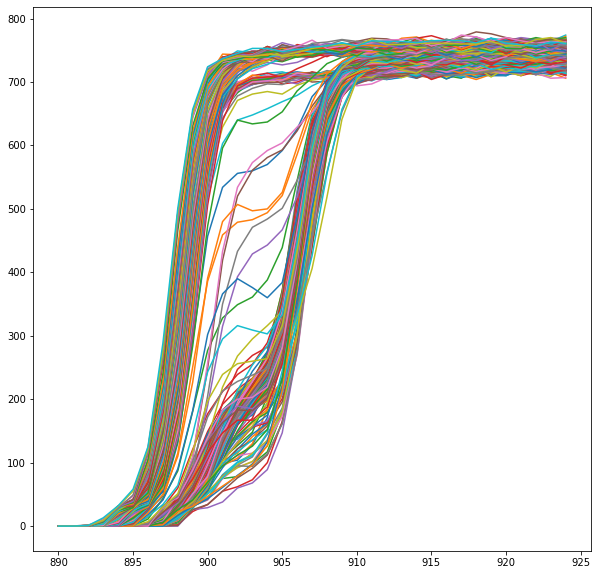

In [83]:
xs = np.arange(890, 925)

figure(figsize=(10,10))
cnt = 1
res = []
for i in np.arange(xmid-200, xmid+200,1):
    #subplot(9,9,cnt)
    cnt += 1
    ys = rotd2[i, xs]
    plot(xs,ys)
    m = fit(erf1d(mn=40, mx=110, offset=np.mean(xs)), xs, ys)
    #plot(xs, m(xs))
    
    res.append(m.parameters)
res = np.array(res)

In [84]:
#mn, mx, sig, off = res.T
mn3, mx3, sig3, off3 = res.T
#mn2, mx2, sig2, off2 = res.T

In [85]:
print(np.mean(off2-off))
print(np.std(off2-off)/np.sqrt(len(off)))

-0.16743890410811418
0.0015592837434800688


(904.0, 907.0)

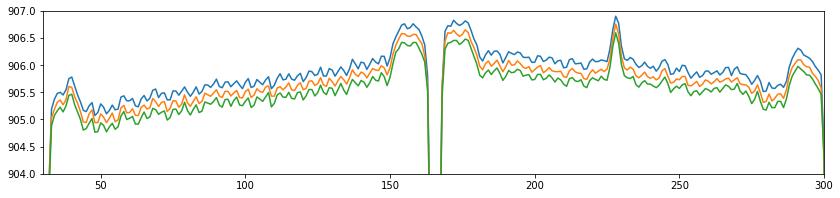

In [96]:
figure(figsize=(14,3))
plot(off) ; plot(off2) ; plot(off3)
xlim(30,300)
ylim(904,907)
#plot(off)

# Fit on a single line

Here I fit on a single row on the detector

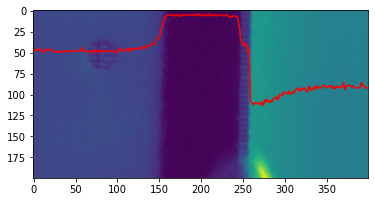

In [27]:
xmid = 1300
ymid = 1500
xsl = slice(xmid-100,xmid+100)
ysl = slice(ymid-200,ymid+200)
imshow(rotd[xsl,ysl]) 
plot(rotd[xmid, ysl], 'r')

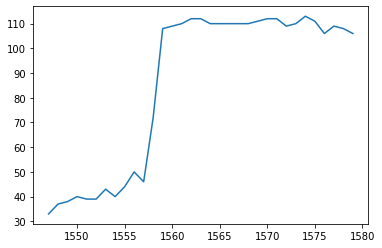

In [28]:
xs = np.arange(1547, 1580)
ys = rotd[xmid, xs]
plot(xs, ys)

In [13]:
m = fit(erf1d(mn=40, mx=110, offset=1558), xs, ys)

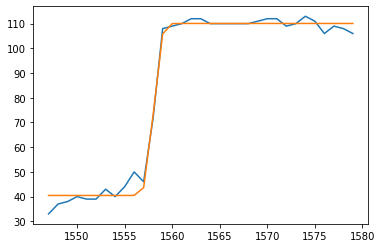

In [15]:
plot(xs, ys)
plot(xs, m(xs))

In [16]:
m

<erf1d(mn=40.464307, mx=110.07941563, sig=0.87482949, offset=1558.0437235)>